# Plotting Sigmoid Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1D Sigmoid Plot

$S_{w, b}(x) = \frac{1}{1+e^{-(wx+b)}}$

In [2]:
def sigmoid(x, w, b):
    return 1 / (1 + np.exp(-(w*x+b)))

In [3]:
sigmoid(1, 0.5, 0)

0.6224593312018546

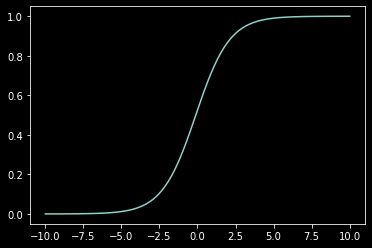

In [4]:
w = 0.9   #@param {type: "slider", min: -2, max:2}
b = 0.1
X = np.linspace(-10, 10, 100)

Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()

## 2D Sigmoid Plot

$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [5]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1 / (1 + np.exp(-(w1*x1 + w2*x2 + b)))

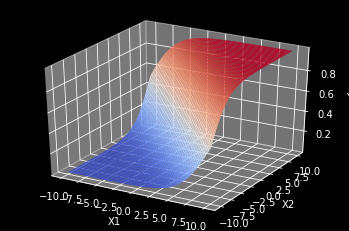

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)
w1 = 0.5
w2 = 0.5
b = 0.1
X1, X2 = np.meshgrid(X1, X2)
Y = sigmoid_2d(X1, X2, w1, w2, b)

ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm, linewidth=1, antialiased=True)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

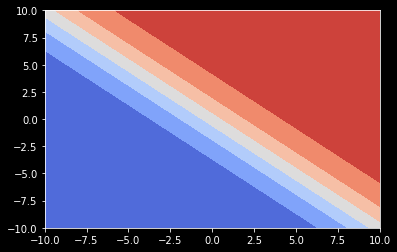

In [7]:
# Another method of visualizing it
plt.contourf(X1, X2, Y, cmap=cm.coolwarm)
plt.show()

# Compute Loss for a Given Dataset

In [8]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

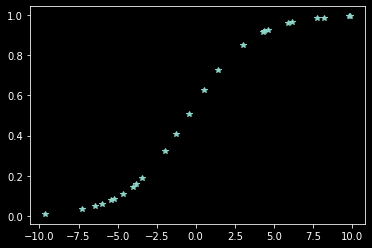

In [9]:
plt.plot(X, Y, '*')
plt.show()

In [10]:
def calculate_loss(X, Y, w_est, b_est):
    loss = 0
    for x, y in zip(X, Y):
        loss += (y-sigmoid(x, w_est, b_est))**2
    return loss

In [11]:
W = np.linspace(-1, 1, 100)
B = np.linspace(-1, 1, 100)

WW, BB, = np.meshgrid(W, B)
loss = np.zeros(WW.shape)

In [12]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

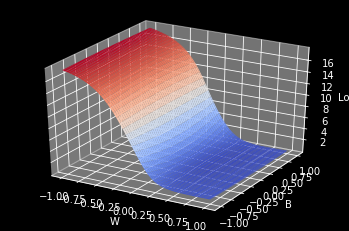

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(WW, BB, loss, cmap=cm.coolwarm, linewidth=1, antialiased=True)
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')
plt.show()

In [14]:
ij = np.argmin(loss)
i = np.floor(ij/loss.shape[1])
j = ij - i * loss.shape[1]

In [15]:
i, j = int(i), int(j)

In [16]:
print(WW[i, j], BB[i, j])

0.49494949494949503 0.2525252525252526


# Sigmoid Neuron demonstration using Toy Data

In [17]:
from sigmoid_neuron import SigmoidNeuron

In [18]:
X = np.array([
    [2.5, 2.5],
    [4, -1],
    [1, -4],
    [3, 1.25],
    [2, 4],
    [1, 5]
])
Y = np.array([1, 1, 1, 0, 0, 0])

In [22]:
sn = SigmoidNeuron()
sn.fit(X, Y, epochs=100, learning_rate=0.1)

In [23]:
print(sn.w, sn.b)

[[-1.7274819  -0.87525351]] [0.027451]
